In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
%matplotlib inline 
import matplotlib.pyplot as plt

In [3]:
housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)
real_est = pd.read_csv('Ames Real Estate Data.csv')

housingdf = housing.copy()

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Seperating Quantative and Qualitative data

strings are object datatype so we filter columns by this

In [4]:
quant = [col for col in housingdf.columns if housingdf.dtypes[col] != 'object']
qual = [col for col in housingdf.columns if housingdf.dtypes[col] == 'object']

## Imputing Missing Data (_Quantitative_)

fill missing data with 0s

In [5]:
housingdf[quant].isna().mean().nlargest(8).round(4) * 100

LotFrontage     17.91
GarageYrBlt      5.00
MasVnrArea       0.54
BsmtFullBath     0.08
BsmtHalfBath     0.08
BsmtFinSF1       0.04
BsmtFinSF2       0.04
BsmtUnfSF        0.04
dtype: float64

In [6]:
housingdf[quant] = housingdf.loc[:, quant].fillna(value=0)

In [7]:
housingdf[quant].isna().mean().nlargest(8).round(4) * 100

PID            0.0
GrLivArea      0.0
SalePrice      0.0
MSSubClass     0.0
LotFrontage    0.0
LotArea        0.0
OverallQual    0.0
OverallCond    0.0
dtype: float64

## Imputing Missing Data (_Qualitative_)

dealing with missing data and dummifying

In [8]:
housingdf[qual].isna().mean().nlargest(8).round(4) * 100

PoolQC          99.65
MiscFeature     96.24
Alley           93.49
Fence           79.65
FireplaceQu     48.10
GarageFinish     5.00
GarageQual       5.00
GarageCond       5.00
dtype: float64

dropping PoolQC, MiscFeature, Alley, Fence since missing lots of data

In [9]:
housingdf.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

removing removed features from qual list

In [10]:
ew = ['PoolQC','MiscFeature','Alley','Fence']
qual = [q for q in qual if q not in ew]

In [11]:
qual

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

adding missing category for any nan values in qual columns

In [12]:
for col in qual:
    housingdf[col] = housingdf[col].astype('category')
    if housingdf[col].isnull().any():
        housingdf[col] = housingdf[col].cat.add_categories(['MISSING'])
        housingdf[col] = housingdf[col].fillna('MISSING')

In [13]:
housingdf[qual].isna().mean().nlargest(10)

MSZoning        0.0
Street          0.0
LotShape        0.0
LandContour     0.0
Utilities       0.0
LotConfig       0.0
LandSlope       0.0
Neighborhood    0.0
Condition1      0.0
Condition2      0.0
dtype: float64

In [14]:
h_quant = housingdf.loc[:, quant]

In [15]:
h_quant

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1,909176150,856,126000,30,0.0,7890,6,6,1939,1950,...,399.0,0,0,0,0,166,0,0,3,2010
2,905476230,1049,139500,120,42.0,4235,5,5,1984,1984,...,266.0,0,105,0,0,0,0,0,2,2009
3,911128020,1001,124900,30,60.0,6060,5,9,1930,2007,...,216.0,154,0,42,86,0,0,0,11,2007
4,535377150,1039,114000,70,80.0,8146,4,8,1900,2003,...,281.0,0,0,168,0,111,0,0,5,2009
5,534177230,1665,227000,60,70.0,8400,8,6,2001,2001,...,528.0,0,45,0,0,0,0,0,11,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,952,121000,30,0.0,8854,6,6,1916,1950,...,192.0,0,98,0,0,40,0,0,5,2009
760,905402060,1733,139600,20,0.0,13680,3,5,1955,1955,...,452.0,0,0,0,0,0,0,0,6,2009
761,909275030,2002,145000,90,82.0,6270,5,6,1949,1950,...,871.0,0,0,0,0,0,0,0,8,2007
762,907192040,1842,217500,60,0.0,8826,7,5,2000,2000,...,486.0,193,96,0,0,0,0,0,7,2007


### Dummifying Nominal Features

In [16]:
nominals = ['MSZoning','Street','LandContour','Utilities','LotConfig','Neighborhood',
           'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st',
           'Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','Electrical',
           'Functional','GarageType', 'PavedDrive', 'SaleType','SaleCondition','LotShape','LandSlope']

In [17]:
nominaldf = housingdf.loc[:, nominals]

In [18]:
#qualdf = housingdf.loc[:, qual]
#print(pd.get_dummies(, prefix=['column1', 'column2']))

In [19]:
ndummydf = pd.get_dummies(nominaldf, drop_first=True)

### Ordinal Encoder for Ordinal Features

In [20]:
toyhouse = housingdf.copy()

In [21]:
qc = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC', 'KitchenQual','FireplaceQu','GarageQual',
           'GarageCond']
rc = ['BsmtFinType1','BsmtFinType2'] 
ordinals = qc+rc+['GarageFinish','BsmtExposure']

In [22]:
ord_df = toyhouse.loc[:,ordinals]

In [23]:
quality = {'MISSING':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
rating = {'MISSING':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}
finish = {'MISSING':0,'Unf':1,'RFn':2,'Fin':3}
exposure = {'MISSING':0,'No':1,'Mn':2,'Av':3,'Gd':4}

In [24]:
for c in qc:
    ord_df[c] = ord_df[c].map(quality)

In [25]:
for c in rc:
    ord_df[c] = ord_df[c].map(rating)

In [26]:
ord_df['BsmtExposure'] = ord_df['BsmtExposure'].map(exposure)

In [27]:
ord_df['GarageFinish'] = ord_df['GarageFinish'].map(finish)

In [28]:
ord_df

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,BsmtFinType1,BsmtFinType2,GarageFinish,BsmtExposure
1,3,3,3,3,3,3,4,3,3,3,1,1,1
2,4,3,4,3,3,4,0,3,3,6,5,3,2
3,4,3,3,3,5,4,0,3,1,5,1,1,1
4,4,4,2,3,4,3,0,3,3,1,1,1,1
5,4,3,4,3,5,4,0,3,3,6,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,3,3,3,3,2,2,4,2,1,1,1,1,1
760,3,3,0,0,5,3,4,3,3,0,0,1,0
761,3,3,3,3,3,3,0,3,3,4,1,1,1
762,4,3,4,3,5,4,3,3,3,6,1,3,1


In [29]:
housingdf[ordinals]

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,BsmtFinType1,BsmtFinType2,GarageFinish,BsmtExposure
1,TA,TA,TA,TA,TA,TA,Gd,TA,TA,Rec,Unf,Unf,No
2,Gd,TA,Gd,TA,TA,Gd,MISSING,TA,TA,GLQ,ALQ,Fin,Mn
3,Gd,TA,TA,TA,Ex,Gd,MISSING,TA,Po,ALQ,Unf,Unf,No
4,Gd,Gd,Fa,TA,Gd,TA,MISSING,TA,TA,Unf,Unf,Unf,No
5,Gd,TA,Gd,TA,Ex,Gd,MISSING,TA,TA,GLQ,Unf,Fin,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,TA,TA,TA,TA,Fa,Fa,Gd,Fa,Po,Unf,Unf,Unf,No
760,TA,TA,MISSING,MISSING,Ex,TA,Gd,TA,TA,MISSING,MISSING,Unf,MISSING
761,TA,TA,TA,TA,TA,TA,MISSING,TA,TA,BLQ,Unf,Unf,No
762,Gd,TA,Gd,TA,Ex,Gd,TA,TA,TA,GLQ,Unf,Fin,No


### Combining dataframes

In [30]:
# concat three dataframes: quantitative variables, nominal category vars, and ordinal category vars
cleandf = pd.concat([h_quant,ord_df,ndummydf],axis=1)

In [31]:
cleandf.BsmtFullBath

1      1.0
2      1.0
3      0.0
4      0.0
5      1.0
      ... 
759    0.0
760    0.0
761    0.0
762    1.0
763    0.0
Name: BsmtFullBath, Length: 2580, dtype: float64

### Feature Engineering

In [32]:
cleandf['Baths'] = cleandf['BsmtFullBath'] + (cleandf['BsmtHalfBath']/2) + cleandf['FullBath']+ (cleandf['HalfBath']/2)

In [33]:
cleandf.drop(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','PID'], axis=1,inplace=True)

---

## CSVs

In [34]:
#cleandf.to_csv('cleanhome.csv',index=False)

labelencoder introduces distance
ordinal 

---

## LassoCV

In [36]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

In [51]:
X = cleandf.drop('SalePrice',axis=1)
y = cleandf['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [52]:
lcv = LassoCV(normalize=True)
lcv.fit(X_train,y_train)

print('train score:',lcv.score(X_train,y_train))
print('test score:',lcv.score(X_test,y_test))

train score: 0.913126559940548
test score: 0.9021507696816247


looking at positive coefs

In [39]:
coefs = pd.Series(lcv.coef_, index=X.columns).sort_values(ascending=False)

In [40]:
coefs.nlargest(20)

Neighborhood_GrnHill     58397.790151
RoofMatl_WdShngl         55195.173802
Exterior1st_PreCast      37544.212094
Neighborhood_StoneBr     36716.951207
Neighborhood_NridgHt     33930.544728
Condition2_PosA          31359.958063
Neighborhood_NoRidge     30396.741240
SaleCondition_Partial    14438.445290
Neighborhood_Somerst     14294.700862
Neighborhood_Crawfor     11434.737025
OverallQual               9372.476365
SaleType_Con              8987.901994
Exterior1st_BrkFace       8925.071632
ExterQual                 8418.205741
Functional_Typ            7811.837008
KitchenQual               6115.199040
LandContour_HLS           6054.069300
Fireplaces                4763.731366
BsmtExposure              4753.834361
Condition1_Norm           4722.449685
dtype: float64

Greenbelts negatively affect saleprice in Ames 

In [71]:
coeffs[coeffs != 0].nsmallest(20)

Condition2_PosN        -116873.320657
Heating_OthW            -21195.359553
SaleCondition_Family    -17167.199765
BldgType_Duplex          -8867.764741
BldgType_Twnhs           -6420.255231
BldgType_TwnhsE          -6093.002120
RoofStyle_Mansard        -5783.144975
Foundation_CBlock        -2396.560528
LandSlope_Sev            -2386.063734
Neighborhood_SWISU       -2183.057644
BedroomAbvGr             -2165.753834
Neighborhood_OldTown     -2001.847163
Neighborhood_NWAmes      -1635.034150
Neighborhood_NAmes       -1556.081442
BsmtCond                 -1528.568322
MasVnrType_BrkFace       -1524.987860
Neighborhood_SawyerW     -1371.771871
Exterior1st_Wd Sdng      -1293.781443
Exterior2nd_Plywood       -919.107856
KitchenAbvGr              -785.224649
dtype: float64

In [75]:
coeffs[coeffs == 0][60:120]

Neighborhood_Veenker   -0.0
SaleType_ConLw          0.0
SaleType_ConLI         -0.0
Neighborhood_Timber    -0.0
BldgType_2fmCon         0.0
Condition1_Feedr       -0.0
Exterior1st_WdShing    -0.0
Exterior1st_Stucco      0.0
Electrical_FuseF        0.0
Exterior1st_MetalSd     0.0
Exterior1st_ImStucc    -0.0
Exterior1st_HdBoard    -0.0
Exterior1st_CemntBd     0.0
Exterior1st_CBlock      0.0
Electrical_FuseP        0.0
Exterior1st_BrkComm     0.0
Exterior1st_AsphShn     0.0
Functional_Min2        -0.0
RoofMatl_WdShake       -0.0
RoofMatl_Tar&Grv        0.0
RoofMatl_Roll          -0.0
RoofMatl_Metal          0.0
Exterior1st_VinylSd     0.0
Exterior2nd_AsphShn     0.0
RoofStyle_Shed         -0.0
Exterior2nd_Brk Cmn     0.0
Heating_GasA           -0.0
Foundation_PConc        0.0
MasVnrType_MISSING     -0.0
MasVnrType_Stone        0.0
Heating_GasW            0.0
Exterior2nd_Wd Shng    -0.0
Exterior2nd_Wd Sdng    -0.0
Heating_Grav            0.0
Exterior2nd_Stucco      0.0
Exterior2nd_Stone   

In [47]:
housingdf.loc[housingdf.Neighborhood == 'GrnHill']

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
110,916253320,1502,330000,120,RM,0.0,9763,Pave,IR1,Lvl,...,0,0,0,0,0,0,9,2007,WD,Normal
684,916252170,1295,230000,120,RM,0.0,8239,Pave,IR1,Lvl,...,0,0,0,0,0,0,11,2006,WD,Normal


In [61]:
housingdf.loc[housingdf.Neighborhood == 'StoneBr']['SalePrice'].mean()

305307.93023255817

In [60]:
housingdf.loc[housingdf.Neighborhood == 'GrnHill']['SalePrice'].mean()

280000.0

In [59]:
housingdf.loc[housingdf.Neighborhood == 'NridgHt']['SalePrice'].mean()

313662.4958677686

In [58]:
housingdf.loc[housingdf.Neighborhood == 'NAmes']['SalePrice'].mean()

145087.25853658537

In [46]:
housingdf.Neighborhood.value_counts()

NAmes      410
CollgCr    236
OldTown    213
Edwards    165
Gilbert    143
Somerst    143
Sawyer     139
NWAmes     123
NridgHt    121
SawyerW    113
Mitchel    104
BrkSide    103
Crawfor     93
IDOTRR      76
NoRidge     67
Timber      54
StoneBr     43
SWISU       42
ClearCr     40
MeadowV     34
BrDale      29
Veenker     23
Blmngtn     23
NPkVill     22
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [76]:
lcv.alpha_

15.962888293971977

---

## Lasso

In [95]:
from sklearn.linear_model import LinearRegression,Lasso
lasso  = Lasso()
alphas = np.linspace(0.1,20.,5)
lasso.set_params(normalize=True,tol=0.1)
coefs_lasso  = []

for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(X_train, y_train)  
        coefs_lasso.append(lasso.coef_)

coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = X.columns)  
coefs_lasso.head()

,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandSlope_Mod,LandSlope_Sev,Baths
0.100,105.436629,-241.328914,39.361505,0.643244,18761.087538,2291.512306,513.487428,40.226470,19.947365,22.326154,...,21298.980306,-23248.450892,3567.082829,6572.429368,3366.558234,-21069.291145,-51.452705,4757.181325,-17120.711808,-1400.827145
5.075,104.516424,-232.889667,36.512759,0.602805,18642.543251,2264.127453,494.861664,56.507382,20.051107,21.852149,...,10664.803286,-21432.628431,3118.881074,3686.068274,1860.136440,-17047.853556,0.000000,2882.140626,-12960.308154,-1216.517385
10.050,103.398620,-224.127422,32.664554,0.566263,18541.956972,2255.477803,478.320769,60.108902,20.042901,21.305716,...,206.871462,-20413.981522,1110.902874,1892.842828,634.011715,-13140.997065,0.000000,1013.543079,-9284.854529,-921.779086
15.025,102.161973,-210.588280,30.408378,0.530669,18535.649946,2235.884441,463.097909,65.079210,19.921547,20.610031,...,0.000000,-19598.073712,0.000000,970.148114,0.000000,-8826.865608,0.000000,156.528334,-5428.724963,-500.882974
20.000,100.859666,-197.535181,28.126649,0.504341,18481.924955,2206.853555,446.542847,69.217739,19.819794,20.005439,...,0.000000,-17854.204455,0.000000,1126.475150,0.000000,-4482.266699,0.000000,0.000000,-1323.561675,-171.803948


In [96]:
pd.Series(lasso.coef_, index=X.columns)

GrLivArea          100.859666
MSSubClass        -197.535181
LotFrontage         28.126649
LotArea              0.504341
OverallQual      18481.924955
                     ...     
LotShape_IR3     -4482.266699
LotShape_Reg         0.000000
LandSlope_Mod        0.000000
LandSlope_Sev    -1323.561675
Baths             -171.803948
Length: 206, dtype: float64

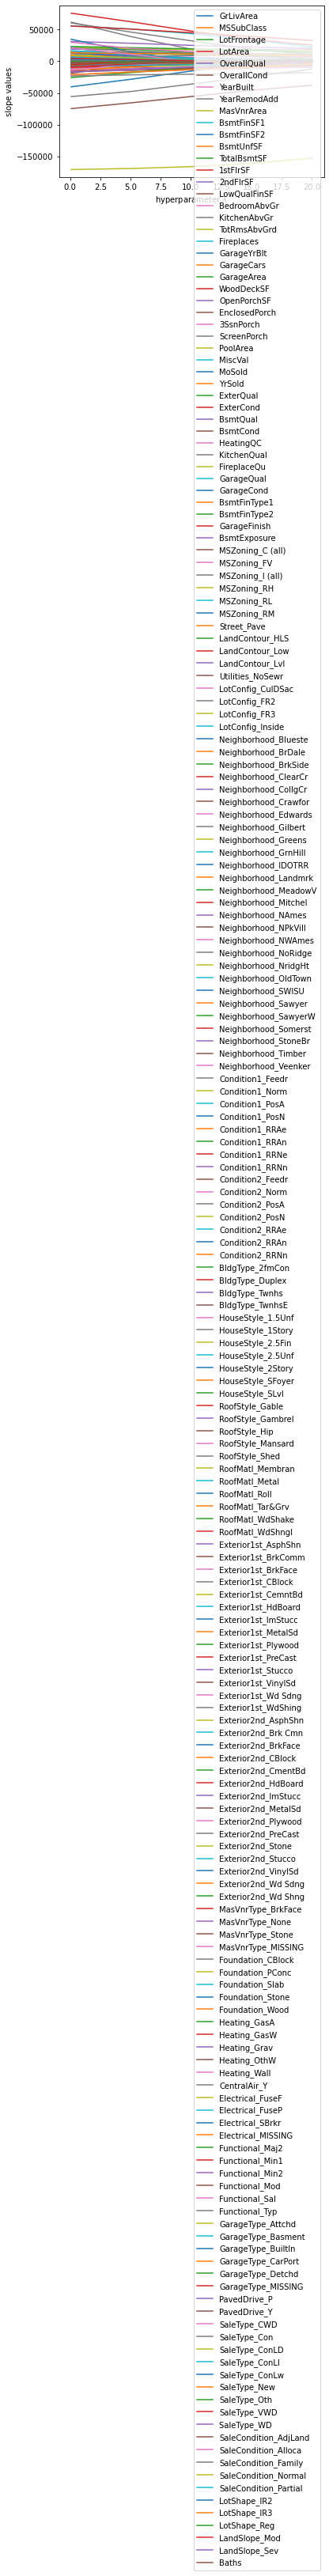

<Figure size 2880x720 with 0 Axes>

In [106]:
for name in coefs_lasso.columns:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.legend(loc=1)

In [122]:
from sklearn.model_selection import train_test_split
np.random.seed(100)  # changing the random seed can produce different scenarios which lead to exceptions
Xtr, Xtst, ytr, ytst = train_test_split(X,y,test_size=0.2)

In [123]:
lasso.set_params(normalize=True)

lasso_scores_train = []
lasso_scores_test  = []

alphas = np.linspace(0.01, 1, 100)

for alpha in alphas:
            lasso.set_params(alpha=alpha)
            lasso.fit(Xtr, ytr)
            lasso_scores_train.append(lasso.score(Xtr, ytr))
            lasso_scores_test.append(lasso.score(Xtst, ytst))
lasso_scores_train = np.array(lasso_scores_train) 
lasso_scores_test  = np.array(lasso_scores_test)

In [118]:
lasso_scores_train

array([0.90558698, 0.9055897 , 0.9055924 , 0.90559509, 0.90559777,
       0.90560043, 0.90560308, 0.90560572, 0.90560834, 0.90561095,
       0.90561354, 0.90561612, 0.90561869, 0.90562124, 0.90562378,
       0.9056263 , 0.90562881, 0.90563131, 0.90563379, 0.90563625,
       0.9056387 , 0.90564114, 0.90564356, 0.90564596, 0.90564835,
       0.90565073, 0.90565309, 0.90565544, 0.90565777, 0.90566009,
       0.90566239, 0.90566468, 0.90566696, 0.90566922, 0.90567146,
       0.90567369, 0.90567591, 0.90567811, 0.9056803 , 0.90568248,
       0.90568466, 0.90568682, 0.90568898, 0.90569111, 0.90569324,
       0.90569534, 0.90569744, 0.90569952, 0.90570158, 0.90570363,
       0.90570567, 0.90570769, 0.90570969, 0.90571169, 0.90571367,
       0.90571563, 0.90571758, 0.90571952, 0.90572145, 0.90572337,
       0.90572528, 0.90572718, 0.90572906, 0.90573092, 0.90573278,
       0.90573461, 0.90573644, 0.90573825, 0.90574004, 0.90574182,
       0.90574359, 0.90574534, 0.90574708, 0.9057488 , 0.90575